# Feature Engineering Unit 1 Exercise 1

Purpose: Solve exercise 1 using bike rental dataset.

Author: Jordan A. Caraballo-Vega

Version: 2024.02.27

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

In [16]:
bike_df = pd.read_csv('/content/drive/MyDrive/Terminal34/unit_1_feature_engineering_exercise_data.csv')
bike_df.head()

,Unnamed: 0,datetime,season,holiday,workingday,weather,temp,humidity,windspeed,casual,registered,count
0,0,2023-01-01 00:00:00,4,0,1,4,15.69,60,0.50,255,756,1011
1,1,2023-01-01 01:00:00,2,0,1,1,16.17,56,16.07,66,931,997
2,2,2023-01-01 02:00:00,1,0,0,2,34.51,81,17.08,78,572,650
3,3,2023-01-01 03:00:00,4,0,1,1,10.81,77,18.87,91,913,1004
4,4,2023-01-01 04:00:00,2,1,0,1,30.16,42,36.44,241,176,417


In [17]:
bike_df.dtypes

Unnamed: 0      int64
datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

## 1. Parse the `datetime` feature to extract and create new features: `hour`, `day`, `month`, and `year`.

In [18]:
bike_df['datetime'] = pd.to_datetime(bike_df['datetime'])
bike_df.head()

,Unnamed: 0,datetime,season,holiday,workingday,weather,temp,humidity,windspeed,casual,registered,count
0,0,2023-01-01 00:00:00,4,0,1,4,15.69,60,0.50,255,756,1011
1,1,2023-01-01 01:00:00,2,0,1,1,16.17,56,16.07,66,931,997
2,2,2023-01-01 02:00:00,1,0,0,2,34.51,81,17.08,78,572,650
3,3,2023-01-01 03:00:00,4,0,1,1,10.81,77,18.87,91,913,1004
4,4,2023-01-01 04:00:00,2,1,0,1,30.16,42,36.44,241,176,417


In [19]:
bike_df.dtypes

Unnamed: 0             int64
datetime      datetime64[ns]
season                 int64
holiday                int64
workingday             int64
weather                int64
temp                 float64
humidity               int64
windspeed            float64
casual                 int64
registered             int64
count                  int64
dtype: object

In [20]:
bike_df['hour'] = bike_df['datetime'].dt.hour
bike_df['day'] = bike_df['datetime'].dt.day
bike_df['month'] = bike_df['datetime'].dt.month
bike_df['year'] = bike_df['datetime'].dt.year

In [21]:
bike_df.head()

,Unnamed: 0,datetime,season,holiday,workingday,weather,temp,humidity,windspeed,casual,registered,count,hour,day,month,year
0,0,2023-01-01 00:00:00,4,0,1,4,15.69,60,0.50,255,756,1011,0,1,1,2023
1,1,2023-01-01 01:00:00,2,0,1,1,16.17,56,16.07,66,931,997,1,1,1,2023
2,2,2023-01-01 02:00:00,1,0,0,2,34.51,81,17.08,78,572,650,2,1,1,2023
3,3,2023-01-01 03:00:00,4,0,1,1,10.81,77,18.87,91,913,1004,3,1,1,2023
4,4,2023-01-01 04:00:00,2,1,0,1,30.16,42,36.44,241,176,417,4,1,1,2023


## 2. Create a new feature `season_name` by mapping the `season` numbers to names.

`season` – 1 = spring, 2 = summer, 3 = fall, 4 = winter


In [22]:
season_dict = {1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'}
bike_df['season_name'] = bike_df['season'].map(season_dict)
bike_df.head()

,Unnamed: 0,datetime,season,holiday,workingday,weather,temp,humidity,windspeed,casual,registered,count,hour,day,month,year,season_name
0,0,2023-01-01 00:00:00,4,0,1,4,15.69,60,0.50,255,756,1011,0,1,1,2023,winter
1,1,2023-01-01 01:00:00,2,0,1,1,16.17,56,16.07,66,931,997,1,1,1,2023,summer
2,2,2023-01-01 02:00:00,1,0,0,2,34.51,81,17.08,78,572,650,2,1,1,2023,spring
3,3,2023-01-01 03:00:00,4,0,1,1,10.81,77,18.87,91,913,1004,3,1,1,2023,winter
4,4,2023-01-01 04:00:00,2,1,0,1,30.16,42,36.44,241,176,417,4,1,1,2023,summer


## 3. Combine `weather` and `temp` to create a new feature `feels_like` that estimates how the temperature feels based on the weather conditions.

1: Clear, Few clouds, Partly cloudy, Partly cloudy

no changes

2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist

-2 degrees cooler

3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds

-5 degrees cooler

4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

-8 degrees cooler


In [23]:
bike_df['weather'].unique()

array([4, 1, 2, 3])

In [24]:
bike_df['temp'].min(), bike_df['temp'].max()

(5.03, 35.0)

In [25]:
def calc_feels_like(temp, weather):
  if weather == 1: # clear
    return temp
  elif weather == 2: # mist
    return temp - 2
  elif weather == 3: # light snow
    return temp - 5
  else: # heavy rain/snow
    return temp - 8

In [26]:
bike_df['feels_like'] = bike_df.apply(lambda row: calc_feels_like(row['temp'], row['weather']), axis=1)

In [27]:
bike_df.head()

,Unnamed: 0,datetime,season,holiday,workingday,weather,temp,humidity,windspeed,casual,registered,count,hour,day,month,year,season_name,feels_like
0,0,2023-01-01 00:00:00,4,0,1,4,15.69,60,0.50,255,756,1011,0,1,1,2023,winter,7.69
1,1,2023-01-01 01:00:00,2,0,1,1,16.17,56,16.07,66,931,997,1,1,1,2023,summer,16.17
2,2,2023-01-01 02:00:00,1,0,0,2,34.51,81,17.08,78,572,650,2,1,1,2023,spring,32.51
3,3,2023-01-01 03:00:00,4,0,1,1,10.81,77,18.87,91,913,1004,3,1,1,2023,winter,10.81
4,4,2023-01-01 04:00:00,2,1,0,1,30.16,42,36.44,241,176,417,4,1,1,2023,summer,30.16


## 4. Create a binary feature `peak_hours` that is 1 if the hour is from 7 to 9 in the morning or from 4 to 6 in the evening, else 0 (assuming these are peak traffic hours).

In [28]:
bike_df['peak_hours'] = bike_df['hour'].apply(lambda x: 1 if (7 <= x <= 9) or (16 <= x <= 18) else 0)
bike_df

,Unnamed: 0,datetime,season,holiday,workingday,weather,temp,humidity,windspeed,casual,registered,count,hour,day,month,year,season_name,feels_like,peak_hours
0,0,2023-01-01 00:00:00,4,0,1,4,15.69,60,0.50,255,756,1011,0,1,1,2023,winter,7.69,0
1,1,2023-01-01 01:00:00,2,0,1,1,16.17,56,16.07,66,931,997,1,1,1,2023,summer,16.17,0
2,2,2023-01-01 02:00:00,1,0,0,2,34.51,81,17.08,78,572,650,2,1,1,2023,spring,32.51,0
3,3,2023-01-01 03:00:00,4,0,1,1,10.81,77,18.87,91,913,1004,3,1,1,2023,winter,10.81,0
4,4,2023-01-01 04:00:00,2,1,0,1,30.16,42,36.44,241,176,417,4,1,1,2023,summer,30.16,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,2023-02-11 11:00:00,2,0,0,1,21.74,65,27.77,14,813,827,11,11,2,2023,summer,21.74,0
996,996,2023-02-11 12:00:00,3,1,1,4,10.14,31,21.68,249,328,577,12,11,2,2023,fall,2.14,0
997,997,2023-02-11 13:00:00,4,0,0,3,8.75,66,34.88,38,436,474,13,11,2,2023,winter,3.75,0
998,998,2023-02-11 14:00:00,3,1,0,2,23.19,75,45.87,69,745,814,14,11,2,2023,fall,21.19,0


In [29]:
bike_df[(bike_df['hour'] >= 7) & (bike_df['hour'] <= 9)]

,Unnamed: 0,datetime,season,holiday,workingday,weather,temp,humidity,windspeed,casual,registered,count,hour,day,month,year,season_name,feels_like,peak_hours
7,7,2023-01-01 07:00:00,4,0,1,3,31.94,32,8.84,174,912,1086,7,1,1,2023,winter,26.94,1
8,8,2023-01-01 08:00:00,4,1,0,2,26.86,67,13.49,158,635,793,8,1,1,2023,winter,24.86,1
9,9,2023-01-01 09:00:00,4,1,1,1,30.54,33,39.59,33,899,932,9,1,1,2023,winter,30.54,1
31,31,2023-01-02 07:00:00,1,0,0,3,15.65,90,11.06,172,970,1142,7,2,1,2023,spring,10.65,1
32,32,2023-01-02 08:00:00,2,1,1,3,23.32,85,9.02,84,251,335,8,2,1,2023,summer,18.32,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
968,968,2023-02-10 08:00:00,3,1,0,2,11.18,73,41.76,275,708,983,8,10,2,2023,fall,9.18,1
969,969,2023-02-10 09:00:00,4,1,0,2,27.68,30,16.69,68,820,888,9,10,2,2023,winter,25.68,1
991,991,2023-02-11 07:00:00,1,1,0,3,26.81,49,11.53,269,974,1243,7,11,2,2023,spring,21.81,1
992,992,2023-02-11 08:00:00,2,0,0,2,27.30,58,49.81,128,839,967,8,11,2,2023,summer,25.30,1


## 5. Standardize the `temp`, `humidity`, and `windspeed` features to have a mean of 0 and a standard deviation of 1.

In [31]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
bike_df[['temp_scaled']] = scaler.fit_transform(bike_df[['temp']])
bike_df[['humidity_scaled', 'windspeed_scaled']] = scaler.fit_transform(bike_df[['humidity', 'windspeed']])

In [32]:
bike_df.head()

,Unnamed: 0,datetime,season,holiday,workingday,weather,temp,humidity,windspeed,casual,...,hour,day,month,year,season_name,feels_like,peak_hours,temp_scaled,humidity_scaled,windspeed_scaled
0,0,2023-01-01 00:00:00,4,0,1,4,15.69,60,0.50,255,...,0,1,1,2023,winter,7.69,0,-0.524887,-0.021733,-1.678348
1,1,2023-01-01 01:00:00,2,0,1,1,16.17,56,16.07,66,...,1,1,1,2023,summer,16.17,0,-0.469037,-0.246942,-0.585043
2,2,2023-01-01 02:00:00,1,0,0,2,34.51,81,17.08,78,...,2,1,1,2023,spring,32.51,0,1.664926,1.160618,-0.514122
3,3,2023-01-01 03:00:00,4,0,1,1,10.81,77,18.87,91,...,3,1,1,2023,winter,10.81,0,-1.092703,0.935409,-0.388431
4,4,2023-01-01 04:00:00,2,1,0,1,30.16,42,36.44,241,...,4,1,1,2023,summer,30.16,0,1.158779,-1.035177,0.845311


<Axes: >

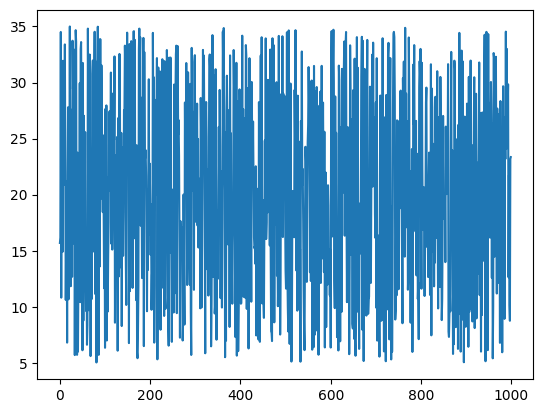

In [33]:
bike_df['temp'].plot()

<Axes: >

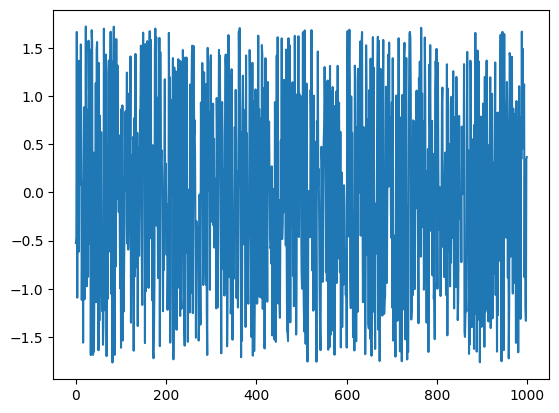

In [34]:
bike_df['temp_scaled'].plot()